In [66]:
import requests

host = 'http://localhost:8080'   #Localhost

# API Call and print
url =  host+'/healthcheck'
resp = requests.get(url) 
print(resp.json())

{'message': 'API is up and running!'}


In [67]:
import os
import requests

host = 'http://127.0.0.1:8080'   # local instance adress 

file_path = 'Datasets\\images_fb\\images\\'                  
file_name = '00a1664b-5017-4eb1-be6f-2439114505c5' # example with computer & software

# Feature extraction
url = host+'/predict/feature_embedding'
file = {'image': open(file_path+file_name+'.jpg', 'rb')}
embedings_req = requests.post(url=url,files=file)
print(embedings_req.json())

{'features': [0.14645007252693176, 0.1447003185749054, 0.010468872264027596, 0.018565727397799492, 0.12015146017074585, 0.072574682533741, -0.11820855736732483, -0.06668830662965775, -0.04668024182319641, 0.13109275698661804, -0.09801457077264786, 0.055759914219379425, -0.06549259275197983]}


In [68]:
from IPython.display import Image as Im
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def plot_image_with_category(file_path,file_name,category_str):
    fig = plt.figure(figsize=(10., 10.), dpi=80)
    grid = ImageGrid(fig, 111, 
                    nrows_ncols=(2, 2), 
                    axes_pad=0.1,
                    )  
    
    img_arr = []
    for image_ID in file_name:
        img_arr.append(Image.open(file_path + image_ID + '.jpg'))
    i = 0
    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
        ax.text(0, 30, 'Similar Images And Labels:'+str(category_str[i]), style='oblique',bbox={'facecolor': 'green', 'alpha': 0.75, 'pad': 10})
        i +=1
    plt.show()


{'similar_index': [7268, 7538, 6865, 7583], 'image_labels': ['fde1c54f-dc76-4f5f-b646-138febe6c7f4', 'd20d8da3-1a85-448f-9032-a2a52e91277d', '0b57207d-462c-43f1-8653-afbe54ad9e3a', 'a074bc84-df8f-4c09-9959-77fd54372b88']}
['Computers & Software', 'Computers & Software', 'Computers & Software', 'Computers & Software']


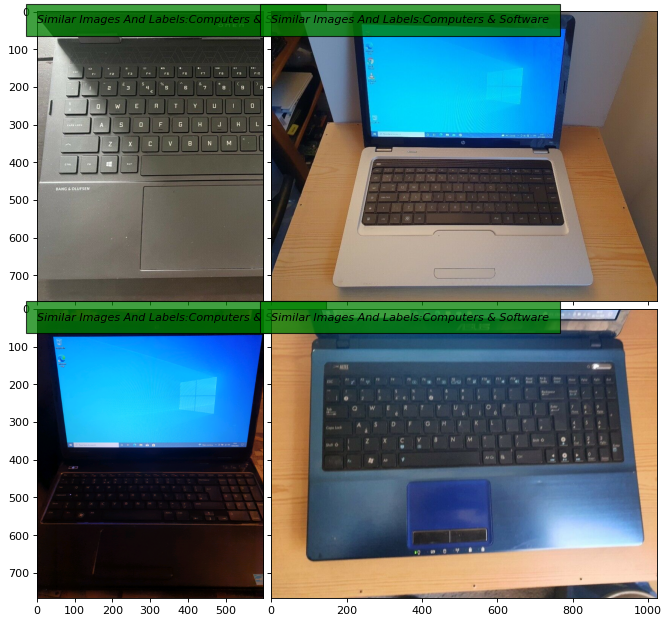

In [74]:
import requests
import pandas as pd

    
host = 'http://127.0.0.1:8080'  

file_path = 'Datasets\\images_fb\\images\\' 

file_name = '00a1664b-5017-4eb1-be6f-2439114505c5' # example with Computer & Software


# Similar Images
url = host+'/predict/similar_images'
file = {'image': open(file_path+file_name+'.jpg', 'rb')} 
resp = requests.post(url=url,files=file)
resp_dic = dict(resp.json())
print(resp_dic)

# Getting Categories of the Similar Images from the Training Data
training_data = pd.read_csv('Datasets/training_data.csv')

image_id_to_label = {row['id_x']: row['label'] for index, row in training_data.iterrows()}
image_labels = resp_dic.get("image_labels", [])

labels = [image_id_to_label[image_id] for image_id in image_labels]

label_encoder = {"Home & Garden": 0, "Baby & Kids Stuff": 1, "DIY Tools & Materials": 2, "Music, Films, Books & Games": 3, "Phones, Mobile Phones & Telecoms": 4, "Clothes, Footwear & Accessories": 5, "Other Goods": 6, "Health & Beauty": 7, "Sports, Leisure & Travel": 8, "Appliances": 9, "Computers & Software": 10, "Office Furniture & Equipment": 11, "Video Games & Consoles": 12}
category=[]
for label in labels:
    category.append(next(key for key, value in label_encoder.items() if value == label))
print(category)

# # Plot images
plot_image_with_category(file_path,image_labels,category)